# Exploring Unsupervised Machine Learning




Our Task is to predict the optimum number of
clusters and represent it visually from the given Iris dataset


Dataset link: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

-Karthik

In [1]:
#importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading dataset
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
target=pd.DataFrame(data=iris.target,columns=["Target"])

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
target_names=iris.target_names

In [7]:
species=target.Target.apply(lambda x: target_names[x])

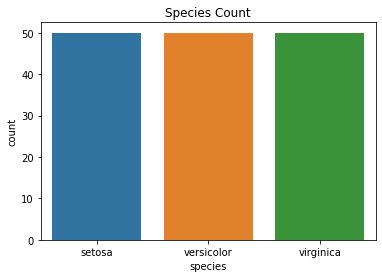

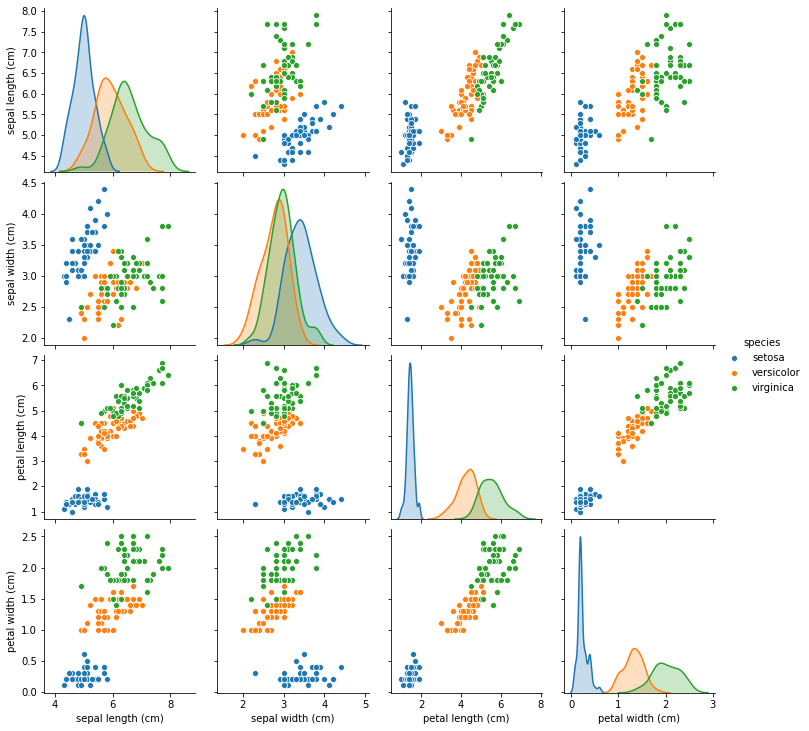

In [8]:
#visualizing count and pairplot
df1=df.copy()
df1["species"]=species
sns.countplot(df1.species)
plt.title("Species Count")
plt.show()
sns.pairplot(df1,hue="species")
plt.show()

From the above graphs we can see that the Species have balanced data


## Model Building


In [9]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [10]:
df=MinMaxScaler().fit_transform(df)

In [11]:
kmeans_scores=[KMeans(n_clusters=i+1).fit(df).inertia_ for i in range(10)]

Text(0.5, 1.0, 'The Elbow Method')

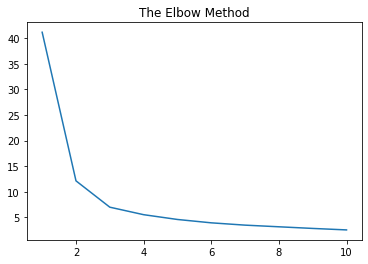

In [12]:
sns.lineplot(np.arange(1,11),kmeans_scores)
plt.title("The Elbow Method")

In [13]:
cluster_kmeans=KMeans(n_clusters=3)

In [14]:
pred=cluster_kmeans.fit_predict(df)

## Visualizing Clusters

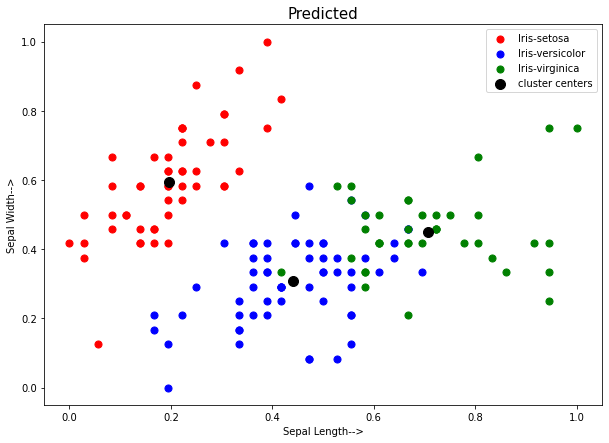

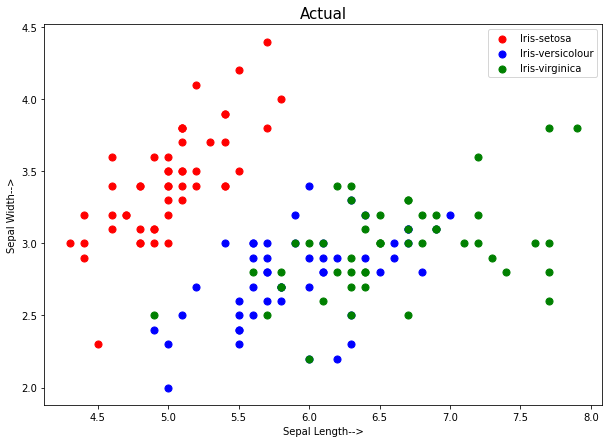

In [15]:
#Visualizing Clusters (Sepal length & Sepal width)
x = df
plt.figure(figsize=(10,7))
plt.title("Predicted",fontsize=15)
plt.scatter(x[pred == 0, 0], x[pred == 0, 1],s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1],s = 50, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(cluster_kmeans.cluster_centers_[:,0],cluster_kmeans.cluster_centers_[:,1],s=100,c="black",label="cluster centers")
plt.xlabel("Sepal Length-->")
plt.ylabel("Sepal Width-->")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.title("Actual",fontsize=15)
plt.scatter(df1[df1.species=="setosa"]["sepal length (cm)"], df1[df1.species=="setosa"]["sepal width (cm)"],s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(df1[df1.species=="versicolor"]["sepal length (cm)"], df1[df1.species=="versicolor"]["sepal width (cm)"],s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df1[df1.species=="virginica"]["sepal length (cm)"], df1[df1.species=="virginica"]["sepal width (cm)"],s = 50, c = 'green', label = 'Iris-virginica')
plt.xlabel("Sepal Length-->")
plt.ylabel("Sepal Width-->")
plt.legend()
plt.show()

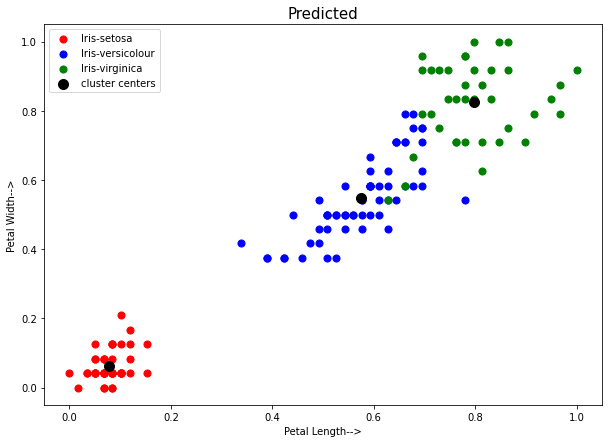

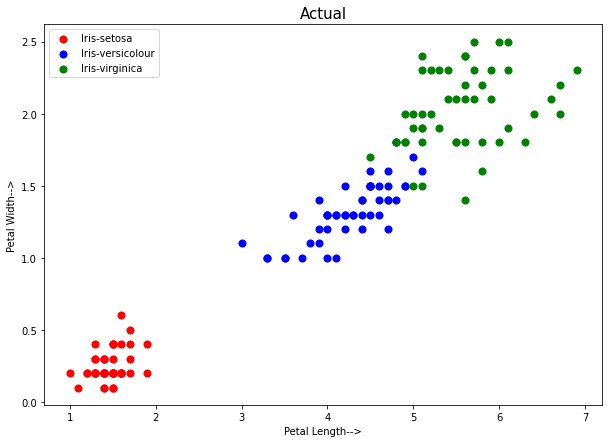

In [16]:
#Visualizing Clusters (Petal length & Petal width)
plt.figure(figsize=(10,7))
plt.title("Predicted",fontsize=15)
plt.scatter(x[pred == 0, 2], x[pred == 0, 3],s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 2], x[pred == 1, 3],s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 2], x[pred == 2, 3],s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(cluster_kmeans.cluster_centers_[:,2],cluster_kmeans.cluster_centers_[:,3],s=100,c="black",label="cluster centers")
plt.xlabel("Petal Length-->")
plt.ylabel("Petal Width-->")
plt.legend()

plt.figure(figsize=(10,7))
plt.title("Actual",fontsize=15)
plt.scatter(df1[df1.species=="setosa"]["petal length (cm)"], df1[df1.species=="setosa"]["petal width (cm)"],s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(df1[df1.species=="versicolor"]["petal length (cm)"], df1[df1.species=="versicolor"]["petal width (cm)"],s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df1[df1.species=="virginica"]["petal length (cm)"], df1[df1.species=="virginica"]["petal width (cm)"],s = 50, c = 'green', label = 'Iris-virginica')
plt.xlabel("Petal Length-->")
plt.ylabel("Petal Width-->")
plt.legend()
plt.show()

In [17]:
cluster_kmeans.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [18]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [19]:
#comparing predictions and actual values
compare=pd.DataFrame()
compare["true"]=target.Target
compare["pred"]=pred

In [20]:
compare.head()

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [21]:
(compare.true.value_counts(),compare.pred.value_counts())

(2    50
 1    50
 0    50
 Name: true, dtype: int64, 1    61
 0    50
 2    39
 Name: pred, dtype: int64)

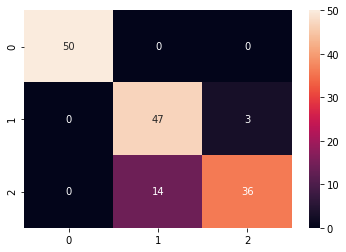

In [22]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(compare.true,compare.pred),fmt="",annot=True)